Time : 2021/8/13

Author: Zhao Han

e-mail: zhaohan@alumni.itp.ac.cn


# Variational auto-encoder

# [1] mathematical basic

## (1) Preliminary knowledge

$X$ is sample data; $\theta$ is model parameter; $Z$ is latent variable.
\begin{equation}
P(X|\theta)=\int_Z P(X,Z|\theta) dZ
\end{equation}
Bayesian formula
\begin{equation}
P(Z|X,\theta)=\frac{P(Z,X|\theta)}{P(X|\theta)}
\end{equation}
Let's take the log of both sides of this equation.
\begin{equation}
\log P(Z|X,\theta)=\log P(Z,X|\theta)-\log P(X|\theta)
\end{equation}
we have,
\begin{equation}
\log P(X|\theta) = \log P(Z,X|\theta) -\log P(Z|X,\theta)
\end{equation}

Add a prior probability distribution $q(Z)$ for the latent variable $Z$.($q(Z)\neq 0$)

\begin{equation}
\log P(X|\theta) = \log \frac{P(Z,X|\theta)}{q(Z)} -\log \frac{P(Z|X,\theta)}{q(Z)}
\end{equation}
Let's integrate both sides of this equation with $q(Z)$.
\begin{equation}
left = \int_Z q(Z)\log P(X|\theta)dZ = \log P(X|\theta)\int_Z q(Z)dZ = \log P(X|\theta)
\end{equation}
\begin{equation}
right = \int_Z q(Z)\log \frac{P(Z,X|\theta)}{q(Z)}dZ -\int_Z q(Z)\log \frac{P(Z|X,\theta)}{q(Z)}dZ
\end{equation}
The first term is ELBO(evidence lower bound) and the second term is KL divergence.
\begin{equation}
\log P(X|\theta) = ELBO +KL(q(Z)||P(Z|X,\theta))
\end{equation}

The VAE purpose is to approximate the real distribution $p$ by using the $q$ obtained by neural network training.

## (2) How to get the loss function?

Calculate the loss. Note that the loss includes two parts.
1. the reconstruction loss. We regard the MNIST as binary classification.
2. the KL divergence. We think the prior and variational inference function are Gaussian distribution.

Loss function = $KL(q(Z)||P(Z|X,\theta))$

\begin{equation}
\langle \phi^* ,\theta^* \rangle = \arg\min_{\theta} KL(q_{\phi}(Z)||P(Z|X,\theta))
\end{equation}

\begin{equation}
KL(q_{\phi}(Z)||P(Z|X,\theta)) = \int_{q(Z)}q(Z)\log \frac{q(Z)}{P(Z|X,\theta)}dZ
\end{equation}
\begin{equation}
= \int_{q(Z)}q(Z)\log q(Z)dZ - \int_{q(Z)}q(Z)\log P(Z|X,\theta)dZ 
\end{equation}
\begin{equation}
= \int_{q(Z)}q(Z)\log q(Z)dZ - \int_{q(Z)}q(Z)\log \frac{P(X|Z,\theta)P(Z,\theta)}{P(X|\theta)}dZ 
\end{equation}
\begin{equation}
= \int_{q(Z)}q(Z)\log q(Z)dZ - \int_{q(Z)}q(Z)\log P(X|Z,\theta)dZ - \int_{q(Z)}q(Z)\log P(Z,\theta)dZ + \int_{q(Z)}q(Z)\log P(X|\theta)dZ 
\end{equation}
\begin{equation}
= \int_{q(Z)}q(Z)\log q(Z)dZ - \int_{q(Z)}q(Z)\log P(X|Z,\theta)dZ - \int_{q(Z)}q(Z)\log P(Z,\theta)dZ  + \log P(X|\theta)
\end{equation}

\begin{equation}
= \int_{q(Z)}q(Z)\log\frac{q(Z)}{P(Z,\theta)}dZ - \int_{q(Z)}q(Z)\log P(X|Z,\theta)dZ + \log P(X|\theta)
\end{equation}
\begin{equation}
= KL(q(Z)||P(Z|\theta)) - E_{q(Z)}[\log P(X|Z,\theta)] + \log P(X|\theta)
\end{equation}

because the $P(X|\theta)$ is a constant, we can get the loss function as follow:

\begin{equation}
loss = - E_{q(Z)}[\log P(X|Z,\theta)] + KL(q(Z)||P(Z|\theta))
\end{equation}

We  have a fact $q(Z)=q(Z|X)$

\begin{equation}
loss = - E_{q(Z|X)}[\log P(X|Z,\theta)] + KL(q(Z|X)||P(Z|\theta))
\end{equation}

The first term is the reconstruction error, which is usually written as a cross entropy function. From the mathematical expression, we can see that $Z$ can be obtained by sampling the known sample $X$, and then $X$ can be obtained by sampling and reconstruction through $Z$, and finally the expectation can be calculated. Of course, we want the expected value to be as high as possible, that is, the result obtained by reconstruction is the same as the original sample.

Here we think the prior and variational function both are Gaussian distribution.
$z$ represents a component of the latent variable, and $x$ represents a sample of the sample set $X$.
\begin{align}
P(z|\mu_P,\sigma_P)&=\frac{1}{\sqrt{2\pi\sigma_P^2}}exp(-\frac{(z-\mu_P)^2}{2\sigma_P^2})\\
q(z|x,\mu_q,\sigma_q)&=\frac{1}{\sqrt{2\pi\sigma_q^2}}exp(-\frac{(z-\mu_q)^2}{2\sigma_q^2})\\
\end{align}

$\mu_P,\sigma_P$ is the parameter of prior distribution, which is a constant. $\mu_q,\sigma_q$ is calculated by the encoder, which is also constant in the loss calculation of a single sample.

The second term:
\begin{align}
KL(q(z|x,\mu_q,\sigma_q)||P(z|\mu_P,\sigma_P)) &= \int_{q(z)}q(z)\log\frac{q(z)}{P(z,\theta)}dz\\
&= \int \frac{1}{\sqrt{2\pi\sigma_q^2}}exp(-\frac{(z-\mu_q)^2}{2\sigma_q^2}) \log\frac{\frac{1}{\sqrt{2\pi\sigma_q^2}}exp(-\frac{(z-\mu_q)^2}{2\sigma_q^2})}{\frac{1}{\sqrt{2\pi\sigma_P^2}}exp(-\frac{(z-\mu_P)^2}{2\sigma_P^2})}dz \\
&= \int \frac{1}{\sqrt{2\pi\sigma_q^2}}exp(-\frac{(z-\mu_q)^2}{2\sigma_q^2}) \times \{-\frac{1}{2}\log(2\pi)-\log(\sigma_q) - \frac{(z-\mu_q)^2}{2\sigma_q^2}+\frac{1}{2}\log(2\pi) + \log(\sigma_P) + \frac{(z-\mu_P)^2}{2\sigma_P^2} \}dz \\
&= \int \frac{1}{\sqrt{2\pi\sigma_q^2}}exp(-\frac{(z-\mu_q)^2}{2\sigma_q^2}) \times \{- \frac{(z-\mu_q)^2}{2\sigma_q^2} + \log(\frac{\sigma_P}{\sigma_q}) + \frac{(z-\mu_P)^2}{2\sigma_P^2} \}dz
\end{align}

\begin{align}
&=E_{q(z)}\{- \frac{(z-\mu_q)^2}{2\sigma_q^2} + \log(\frac{\sigma_P}{\sigma_q}) + \frac{(z-\mu_P)^2}{2\sigma_P^2} \}\\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2\sigma_q^2}E_{q(z)}\{(z-\mu_q)^2 \} + \frac{1}{2\sigma_P^2}E_{q(z)}\{(z-\mu_P)^2 \} \\
\end{align}

because $\sigma^2_q = E_{q(z)}\{(z-\mu_q)^2$\}

\begin{align}
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{\sigma^2_q}{2\sigma_q^2}+ \frac{1}{2\sigma_P^2}E_{q(z)}\{(z-\mu_P)^2 \} \\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{1}{2\sigma_P^2}E_{q(z)}\{(z-\mu_q+\mu_q-\mu_P)^2 \} \\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{1}{2\sigma_P^2}E_{q(z)}\{(z-\mu_q)^2+(\mu_q-\mu_P)^2+2(z-\mu_q)(\mu_q-\mu_P) \} \\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{1}{2\sigma_P^2}E_{q(z)}\{(z-\mu_q)^2\} + E_{q(z)}\{(\mu_q-\mu_P)^2\} + 2 E_{q(z)}\{(z-\mu_q)(\mu_q-\mu_P) \} \\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{1}{2\sigma_P^2}\{\sigma_q^2 + (\mu_q-\mu_P)^2 + 2* 0 *(\mu_q-\mu_P) \} \\
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{\sigma_q^2 + (\mu_q-\mu_P)^2}{2\sigma_P^2} \\
\end{align}

let the $\mu_P=0, \sigma_P = 1$

Finally, the second term
\begin{align}
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{\sigma_q^2 + (\mu_q-\mu_P)^2}{2\sigma_P^2} \\
&= \log(\frac{1}{\sigma_q}) - \frac{1}{2}+ \frac{\sigma_q^2 + \mu_q^2}{2} \\
&= -\frac{1}{2}[\log(\sigma_q^2) +1 - \sigma_q^2 - \mu_q^2]
\end{align}

# [2] The network structure

![1](structure.jpg)

![2](structure2.png)

![3](structure3.png)

![4](structure4.jpg)

## reparameter trick
![reparameter trick](reparameter1.png)

![reparameter trick](reparameter.png)

## our proposal
![DKL ](DKL.jpg)

# [3] code

For a batch of samples, each sample is stored as a $\color{red} {row\  vector}$ in the network.

If you want to repeat the model, you can use the check point.(modify the hyper-parameter resume to the dir)

## (1)VAE

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
from torchsummary import summary

In [80]:
import torch
import torch.nn as  nn
import torch.nn.functional as F
import torch.optim as  optim
from torchvision.utils import save_image
import os
import shutil
import numpy as np

In [82]:
# hyper-parameter
BATCH_SIZE = 128
NUM_WORKERS = 1

result_dir = './VAEresult' # './VAEresult'  result dir
save_dir = './ckpt' # model saving directory
batch_size = 128 # input batch size for training (default: 128)
epochs = 50 # number of epochs to train (default: 10)
seed = 1 # random seed (default: 1)
resume = None #path to latest checkpoint (default: None)
test_every = 10 # test after every epochs
num_worker = 1 # num_worker

In [77]:
def prepare_MNIST(batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
	transform = transforms.Compose([transforms.ToTensor(),])

	training_set = torchvision.datasets.MNIST("../data", train=True, download=True, transform=transform)
	test_set = torchvision.datasets.MNIST("../data", train=False, download=True, transform=transform)
	# num_workers denotes how many subprocesses to use for data loading
	trainloader = DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
	testloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)

	clssses = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
	return trainloader, testloader, clssses


def imshow(img):
	# img = img / 2 + 0.5  # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

Failed to download (trying next):
<urlopen error [Errno 11002] getaddrinfo failed>



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset\MNIST\raw\train-images-idx3-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
<urlopen error [Errno 11002] getaddrinfo failed>



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset\MNIST\raw\train-labels-idx1-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
<urlopen error [Errno 11002] getaddrinfo failed>



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
<urlopen error [Errno 11002] getaddrinfo failed>



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./dataset\MNIST\raw



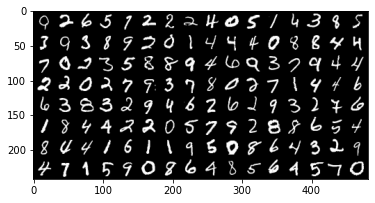

In [78]:
trainloader, testloader, classes = prepare_MNIST()
data_iter = iter(trainloader)
imgs, labels = data_iter.next()
imshow(torchvision.utils.make_grid(imgs, nrow=16))

In [79]:
class VAE(nn.Module):
	def __init__(self, input_dim=784, h_dim=400, z_dim=20):
		super(VAE, self).__init__()
		# encoder part
		self.fc1 = nn.Linear(input_dim, h_dim)
		self.fc2 = nn.Linear(h_dim, z_dim)  # mu
		self.fc3 = nn.Linear(h_dim, z_dim)  # log_sigma

		# decoder part
		self.fc4 = nn.Linear(z_dim, h_dim)
		self.fc5 = nn.Linear(h_dim, input_dim)

	def forward(self, x):
		mu, log_sigma = self.encode(x)
		sampled_z = self.reparameterzie(mu, log_sigma)
		res = self.decode(sampled_z)

		return res, mu, log_sigma

	def encode(self, x):
		"""
		encoding part.
		:param x: input image
		:return: mu and log_(sigma**2)
		"""
		h = F.relu(self.fc1(x))
		mu = self.fc2(h)
		log_sigma = self.fc3(h)  # estimate log(sigma**2) actually
		return mu, log_sigma

	def reparameterzie(self, mu, log_sigma):
		"""
		Given a standard gaussian distribution epsilon ~ N(0,1),
		we can sample the random variable z as per z = mu + sigma * epsilon
		:param mu:
		:param log_sigma:
		:return: sampled z
		"""
		std = torch.exp(log_sigma * 0.5)
		eps = torch.randn_like(std)
		return mu + std * eps

	def decode(self, x):
		"""
		Given a sampled z, decode it back to image
		:param x:
		:return:
		"""
		h = F.relu(self.fc4(x))
		res = torch.sigmoid(self.fc5(h))
		return res

In [81]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print(device)

cuda


In [83]:
def save_checkpoint(state, is_best, outdir):

	if not os.path.exists(outdir):
		os.makedirs(outdir)

	checkpoint_file = os.path.join(outdir, 'checkpoint.pth')
	best_file = os.path.join(outdir, 'model_best.pth')
	torch.save(state, checkpoint_file)
	if is_best:
		shutil.copyfile(checkpoint_file, best_file)

Finally, the second term
\begin{align}
&= \log(\frac{\sigma_P}{\sigma_q}) - \frac{1}{2}+ \frac{\sigma_q^2 + (\mu_q-\mu_P)^2}{2\sigma_P^2} \\
&= \log(\frac{1}{\sigma_q}) - \frac{1}{2}+ \frac{\sigma_q^2 + \mu_q^2}{2} \\
&= -\frac{1}{2}[\log(\sigma_q^2) +1 - \sigma_q^2 - \mu_q^2] \\
&= \frac{1}{2}[\sigma_q^2 + \mu_q^2 -1 - \log(\sigma_q^2) ]
\end{align}

In [ ]:
def loss_func(recon_x, inputs, mu, log_var):
	# Calculate the loss. Note that the loss includes two parts.
	# 1. the reconstruction loss.
	# We regard the MNIST as binary classification
	reconstruction_loss = F.binary_cross_entropy(recon_x, inputs, reduction='sum')

	# 2. KL-divergence
	# D_KL(Q(z|X) || P(z)); calculate in closed form as both dist. are Gaussian
	divergence = 0.5 * torch.sum(torch.exp(log_var) + torch.pow(mu, 2) - 1. - log_var)

	loss = reconstruction_loss + divergence

	return loss, reconstruction_loss, divergence

In [85]:
'''
np.finfo使用方法
    eps是一个很小的非负数
    除法的分母不能为0的,不然会直接跳出显示错误。
    使用eps将可能出现的零用eps来替换，这样不会报错。
'''
x = np.array([1, 2, 3], dtype=float)
eps = np.finfo(x.dtype).eps  # eps = 2.220446049250313e-16 type = <class 'numpy.float64'>
print(eps, type(eps))
height = np.array([0, 2, 3], dtype=float)
height = np.maximum(height, eps) #一旦height中出现0，就用eps进行替换
print(height)   #[2.22044605e-16 2.00000000e+00 3.00000000e+00]
dy = x / height
print(dy)   #[4.50359963e+15 1.00000000e+00 1.00000000e+00]

2.220446049250313e-16 <class 'numpy.float64'>
[2.22044605e-16 2.00000000e+00 3.00000000e+00]
[4.50359963e+15 1.00000000e+00 1.00000000e+00]


In [88]:
lr = 1e-3 # learning rate
z_dim = 20 # latent vector size of encoder
input_dim = 28*28 #input dimension (28*28 for MNIST)
h_dim = 400 
input_channel = 1 #input channel (1 for MNIST)

In [102]:
def train():
    #myVAE = ConvVAE(input_channels=args.input_channel, z_dim=args.z_dim).to(device)
    myVAE = VAE(input_dim, h_dim, z_dim).to(device)
    optimizer = optim.Adam(myVAE.parameters(), lr=lr)

    start_epoch = 0
    best_test_loss = np.finfo('f').max

    # optionally resume from a checkpoint
    if resume:
        if os.path.isfile(resume):
            print('=> loading checkpoint %s' % resume)
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch'] + 1
            best_test_loss = checkpoint['best_test_loss']
            myVAE.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print('=> loaded checkpoint %s' % resume)
        else:
            print('=> no checkpoint found at %s' % resume)

    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    trainloader, testloader, classes = prepare_MNIST(batch_size, num_worker)


    # training
    for epoch in range(start_epoch, epochs):

        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            # Remember to deploy the input data on GPU
            inputs = data[0].to(device)
            inputs = inputs.view(-1, input_dim)
            # forward
            res, mu, log_sigma = myVAE(inputs)

            loss, recon_loss, KLD = loss_func(res, inputs, mu, log_sigma)
            # zero out the paramter gradients
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print statistics every 100 batches
            if (i + 1) % 100 == 0:
                print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f} Total loss {:.4f}"
                      .format(epoch + 1, epochs, i + 1, len(trainloader), recon_loss.item(),
                              KLD.item(), loss.item()))

            if i == 0:
                # visualize reconstructed result at the beginning of each epoch
                x_concat = torch.cat([inputs.view(-1, 1, 28, 28), res.view(-1, 1, 28, 28)], dim=3)
                save_image(x_concat, ("./%s/reconstructed-%d.png" % (result_dir, epoch + 1)))

        # testing
        if (epoch + 1) % test_every == 0:
            test_avg_loss = 0.0
            with torch.no_grad():
                for idx, test_data in enumerate(testloader):
                    # get the inputs; data is a list of [inputs, labels]
                    test_inputs = test_data[0].to(device)
                    test_inputs = test_inputs.view(-1, input_dim)
                    # forward
                    test_res, test_mu, test_log_sigma = myVAE(test_inputs)

                    test_loss, test_recon_loss, test_KLD = loss_func(test_res, test_inputs, test_mu, test_log_sigma)

                    test_avg_loss += test_loss

                test_avg_loss /= len(testloader.dataset)

                # we randomly sample some images' latent vectors from its distribution
                z = torch.randn(batch_size, z_dim).to(device)
                random_res = myVAE.decode(z).view(-1, 1, 28, 28)
                save_image(random_res, "./%s/random_sampled-%d.png" % (result_dir, epoch + 1))

                # save model
                is_best = test_avg_loss < best_test_loss
                best_test_loss = min(test_avg_loss, best_test_loss)
                save_checkpoint({
                    'epoch': epoch,
                    'best_test_loss': best_test_loss,
                    'state_dict': myVAE.state_dict(),
                    'optimizer': optimizer.state_dict(),
                }, is_best,save_dir)

In [103]:
train()

D:\anaconda3\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch[1/50], Step [100/469], Reconst Loss: 21606.2734, KL Div: 1202.8851 Total loss 22809.1582
Epoch[1/50], Step [200/469], Reconst Loss: 18060.4023, KL Div: 1963.9102 Total loss 20024.3125
Epoch[1/50], Step [300/469], Reconst Loss: 15766.8418, KL Div: 2265.4927 Total loss 18032.3340
Epoch[1/50], Step [400/469], Reconst Loss: 14997.1738, KL Div: 2449.9663 Total loss 17447.1406
Epoch[2/50], Step [100/469], Reconst Loss: 13737.1016, KL Div: 2833.0530 Total loss 16570.1543
Epoch[2/50], Step [200/469], Reconst Loss: 12486.8398, KL Div: 2799.7402 Total loss 15286.5801
Epoch[2/50], Step [300/469], Reconst Loss: 12383.4219, KL Div: 2869.5176 Total loss 15252.9395
Epoch[2/50], Step [400/469], Reconst Loss: 12164.8174, KL Div: 2907.5793 Total loss 15072.3965
Epoch[3/50], Step [100/469], Reconst Loss: 11766.1025, KL Div: 3021.1660 Total loss 14787.2686
Epoch[3/50], Step [200/469], Reconst Loss: 12211.3027, KL Div: 3028.1709 Total loss 15239.4736
Epoch[3/50], Step [300/469], Reconst Loss: 11722.3

Epoch[22/50], Step [300/469], Reconst Loss: 10082.4707, KL Div: 3178.0200 Total loss 13260.4902
Epoch[22/50], Step [400/469], Reconst Loss: 10254.4258, KL Div: 3260.3618 Total loss 13514.7871
Epoch[23/50], Step [100/469], Reconst Loss: 9906.2627, KL Div: 3115.2971 Total loss 13021.5596
Epoch[23/50], Step [200/469], Reconst Loss: 10107.2070, KL Div: 3248.0752 Total loss 13355.2822
Epoch[23/50], Step [300/469], Reconst Loss: 10222.6445, KL Div: 3311.3860 Total loss 13534.0303
Epoch[23/50], Step [400/469], Reconst Loss: 9830.3682, KL Div: 3280.0938 Total loss 13110.4619
Epoch[24/50], Step [100/469], Reconst Loss: 9759.3945, KL Div: 3217.5520 Total loss 12976.9463
Epoch[24/50], Step [200/469], Reconst Loss: 9394.9404, KL Div: 3029.4524 Total loss 12424.3926
Epoch[24/50], Step [300/469], Reconst Loss: 9603.5645, KL Div: 3166.0771 Total loss 12769.6416
Epoch[24/50], Step [400/469], Reconst Loss: 10291.1338, KL Div: 3297.5513 Total loss 13588.6855
Epoch[25/50], Step [100/469], Reconst Loss: 9

Epoch[44/50], Step [100/469], Reconst Loss: 9699.5439, KL Div: 3286.9790 Total loss 12986.5234
Epoch[44/50], Step [200/469], Reconst Loss: 9935.1250, KL Div: 3233.9370 Total loss 13169.0625
Epoch[44/50], Step [300/469], Reconst Loss: 9853.1309, KL Div: 3209.7017 Total loss 13062.8320
Epoch[44/50], Step [400/469], Reconst Loss: 10288.2734, KL Div: 3324.4961 Total loss 13612.7695
Epoch[45/50], Step [100/469], Reconst Loss: 9574.5723, KL Div: 3192.6990 Total loss 12767.2715
Epoch[45/50], Step [200/469], Reconst Loss: 9953.3408, KL Div: 3192.0920 Total loss 13145.4326
Epoch[45/50], Step [300/469], Reconst Loss: 10104.7480, KL Div: 3261.4492 Total loss 13366.1973
Epoch[45/50], Step [400/469], Reconst Loss: 9954.5996, KL Div: 3291.0596 Total loss 13245.6592
Epoch[46/50], Step [100/469], Reconst Loss: 9906.9580, KL Div: 3299.4956 Total loss 13206.4531
Epoch[46/50], Step [200/469], Reconst Loss: 9562.5371, KL Div: 3232.5562 Total loss 12795.0938
Epoch[46/50], Step [300/469], Reconst Loss: 1045

## (2) ConVAE

In [ ]:
class Flatten(nn.Module):
	def forward(self, inputs):
		return inputs.view(inputs.size(0), -1)


class Unflatten(nn.Module):
	def __init__(self, channel, height, width):
		super(Unflatten, self).__init__()
		self.channel = channel
		self.height = height
		self.width = width

	def forward(self, inputs):
		return inputs.view(inputs.size(0), self.channel, self.height, self.width)

![convolution](stride.JPG)

![convolution](stride2.JPG)

![convolution](padding.JPG)

![convolution](pooling.JPG)

![convolution](upsampling.JPG)

![convolution](transposed_convolution.JPG)

In [ ]:
class ConvVAE(nn.Module):

	def __init__(self, input_channels=1, z_dim=20):
		super(ConvVAE, self).__init__()

		self.z_dim = z_dim

		self.encoder = nn.Sequential(
			nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
			nn.ReLU(),
			nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
			nn.ReLU(),  # [?,128,7,7]
			Flatten(),
			nn.Linear(6272, 1024),
			nn.ReLU()
		)

		# hidden => mu
		self.fc1 = nn.Linear(1024, self.z_dim)

		# hidden => logvar
		self.fc2 = nn.Linear(1024, self.z_dim)

		self.decoder = nn.Sequential(
			nn.Linear(self.z_dim, 1024),
			nn.ReLU(),
			nn.Linear(1024, 6272),
			nn.ReLU(),
			Unflatten(128, 7, 7),
			nn.ReLU(),
			nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
			nn.ReLU(),
			nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
			torch.Sigmoid()
		)

	def encode(self, x):
		h = self.encoder(x)
		mu, logvar = self.fc1(h), self.fc2(h)
		return mu, logvar

	def decode(self, z):
		z = self.decoder(z)
		return z

	def reparameterize(self, mu, logvar):
		std = torch.exp(0.5 * logvar)
		eps = torch.randn_like(std)
		return eps.mul(std).add_(mu)

	def forward(self, x):
		mu, logvar = self.encode(x)
		z = self.reparameterize(mu, logvar)
		return self.decode(z), mu, logvar

In [119]:
model = ConvVAE()
print(model)

ConvVAE(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten()
    (5): Linear(in_features=6272, out_features=1024, bias=True)
    (6): ReLU()
  )
  (fc1): Linear(in_features=1024, out_features=20, bias=True)
  (fc2): Linear(in_features=1024, out_features=20, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=6272, bias=True)
    (3): ReLU()
    (4): Unflatten()
    (5): ReLU()
    (6): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): Sigmoid()
  )
)


The calculation formula of image size after convolution：N = (W − F + 2P )/S+1

W is the original image size, F is the convolution kernel size, P is the padding size, and S is the step size.

conv1 = (28-4+2)/2+1 = 14

conv2 = (14-4+2)/2+1 = 7

6272=7$\times$7$\times$128

nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)

padding(int or tuple, optional) - 输入的每一条边补充0的层数，高宽都增加2*padding

output_padding(int or tuple, optional) - 输出边补充0的层数，高宽都增加padding

输出尺寸计算：
output = (input-1)$\times$stride+output_padding -2$\times$padding+kernelsize

In [120]:
from torchsummary import summary

In [124]:
summary(model.to(device),(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           1,088
              ReLU-2           [-1, 64, 14, 14]               0
            Conv2d-3            [-1, 128, 7, 7]         131,200
              ReLU-4            [-1, 128, 7, 7]               0
           Flatten-5                 [-1, 6272]               0
            Linear-6                 [-1, 1024]       6,423,552
              ReLU-7                 [-1, 1024]               0
            Linear-8                   [-1, 20]          20,500
            Linear-9                   [-1, 20]          20,500
           Linear-10                 [-1, 1024]          21,504
             ReLU-11                 [-1, 1024]               0
           Linear-12                 [-1, 6272]       6,428,800
             ReLU-13                 [-1, 6272]               0
        Unflatten-14            [-1, 12

In [107]:
result_dir = './conVAEresult' # './convVAEresult'  result dir
save_dir = './Conckpt' # model saving directory

lr = 1e-3 # learning rate
z_dim = 20 # latent vector size of encoder
input_dim = 28*28 #input dimension (28*28 for MNIST)
h_dim = 400 
input_channel = 1 #input channel (1 for MNIST)

In [125]:
def train():
    myVAE = ConvVAE(input_channels=input_channel, z_dim=z_dim).to(device)
    #myVAE = VAE(input_dim, h_dim, z_dim).to(device)
    optimizer = optim.Adam(myVAE.parameters(), lr=lr)

    start_epoch = 0
    best_test_loss = np.finfo('f').max

    # optionally resume from a checkpoint
    if resume:
        if os.path.isfile(resume):
            print('=> loading checkpoint %s' % resume)
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch'] + 1
            best_test_loss = checkpoint['best_test_loss']
            myVAE.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print('=> loaded checkpoint %s' % resume)
        else:
            print('=> no checkpoint found at %s' % resume)

    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    trainloader, testloader, classes = prepare_MNIST(batch_size, num_worker)


    # training
    for epoch in range(start_epoch, epochs):

        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            # Remember to deploy the input data on GPU
            inputs = data[0].to(device)
      #      inputs = inputs.view(-1, input_dim)
            # forward
            res, mu, log_sigma = myVAE(inputs)

            loss, recon_loss, KLD = loss_func(res, inputs, mu, log_sigma)
            # zero out the paramter gradients
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print statistics every 100 batches
            if (i + 1) % 100 == 0:
                print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f} Total loss {:.4f}"
                      .format(epoch + 1, epochs, i + 1, len(trainloader), recon_loss.item(),
                              KLD.item(), loss.item()))

            if i == 0:
                # visualize reconstructed result at the beginning of each epoch
                x_concat = torch.cat([inputs.view(-1, 1, 28, 28), res.view(-1, 1, 28, 28)], dim=3)
                save_image(x_concat, ("./%s/reconstructed-%d.png" % (result_dir, epoch + 1)))

        # testing
        if (epoch + 1) % test_every == 0:
            test_avg_loss = 0.0
            with torch.no_grad():
                for idx, test_data in enumerate(testloader):
                    # get the inputs; data is a list of [inputs, labels]
                    test_inputs = test_data[0].to(device)
        #            test_inputs = test_inputs.view(-1, input_dim)
                    # forward
                    test_res, test_mu, test_log_sigma = myVAE(test_inputs)

                    test_loss, test_recon_loss, test_KLD = loss_func(test_res, test_inputs, test_mu, test_log_sigma)

                    test_avg_loss += test_loss

                test_avg_loss /= len(testloader.dataset)

                # we randomly sample some images' latent vectors from its distribution
                z = torch.randn(batch_size, z_dim).to(device)
                random_res = myVAE.decode(z).view(-1, 1, 28, 28)
                save_image(random_res, "./%s/random_sampled-%d.png" % (result_dir, epoch + 1))

                # save model
                is_best = test_avg_loss < best_test_loss
                best_test_loss = min(test_avg_loss, best_test_loss)
                save_checkpoint({
                    'epoch': epoch,
                    'best_test_loss': best_test_loss,
                    'state_dict': myVAE.state_dict(),
                    'optimizer': optimizer.state_dict(),
                }, is_best,save_dir)

In [126]:
train()

Epoch[1/50], Step [100/469], Reconst Loss: 23650.6484, KL Div: 679.5708 Total loss 24330.2188
Epoch[1/50], Step [200/469], Reconst Loss: 17797.7871, KL Div: 1542.8169 Total loss 19340.6035
Epoch[1/50], Step [300/469], Reconst Loss: 15366.7100, KL Div: 1884.6241 Total loss 17251.3340
Epoch[1/50], Step [400/469], Reconst Loss: 13438.6592, KL Div: 2340.7422 Total loss 15779.4014
Epoch[2/50], Step [100/469], Reconst Loss: 12399.2988, KL Div: 2442.2593 Total loss 14841.5586
Epoch[2/50], Step [200/469], Reconst Loss: 11292.7227, KL Div: 2536.2363 Total loss 13828.9590
Epoch[2/50], Step [300/469], Reconst Loss: 11196.7363, KL Div: 2419.8599 Total loss 13616.5957
Epoch[2/50], Step [400/469], Reconst Loss: 10872.4707, KL Div: 2568.9236 Total loss 13441.3945
Epoch[3/50], Step [100/469], Reconst Loss: 10698.9775, KL Div: 2518.6460 Total loss 13217.6230
Epoch[3/50], Step [200/469], Reconst Loss: 10118.7988, KL Div: 2630.3540 Total loss 12749.1523
Epoch[3/50], Step [300/469], Reconst Loss: 10846.11

Epoch[22/50], Step [400/469], Reconst Loss: 9327.5020, KL Div: 2806.4924 Total loss 12133.9941
Epoch[23/50], Step [100/469], Reconst Loss: 9137.8516, KL Div: 2809.0640 Total loss 11946.9160
Epoch[23/50], Step [200/469], Reconst Loss: 9470.6816, KL Div: 2824.7605 Total loss 12295.4424
Epoch[23/50], Step [300/469], Reconst Loss: 9608.8926, KL Div: 2740.5469 Total loss 12349.4395
Epoch[23/50], Step [400/469], Reconst Loss: 9038.4102, KL Div: 2896.0942 Total loss 11934.5039
Epoch[24/50], Step [100/469], Reconst Loss: 9327.3086, KL Div: 2811.9546 Total loss 12139.2637
Epoch[24/50], Step [200/469], Reconst Loss: 9352.3330, KL Div: 2698.2759 Total loss 12050.6094
Epoch[24/50], Step [300/469], Reconst Loss: 9228.7461, KL Div: 2766.1504 Total loss 11994.8965
Epoch[24/50], Step [400/469], Reconst Loss: 9158.7188, KL Div: 2801.7390 Total loss 11960.4580
Epoch[25/50], Step [100/469], Reconst Loss: 9196.4805, KL Div: 2788.9155 Total loss 11985.3965
Epoch[25/50], Step [200/469], Reconst Loss: 9107.5

Epoch[44/50], Step [300/469], Reconst Loss: 8750.6641, KL Div: 2795.0247 Total loss 11545.6885
Epoch[44/50], Step [400/469], Reconst Loss: 9300.8701, KL Div: 2974.1482 Total loss 12275.0186
Epoch[45/50], Step [100/469], Reconst Loss: 8780.6191, KL Div: 2742.6050 Total loss 11523.2246
Epoch[45/50], Step [200/469], Reconst Loss: 9486.3506, KL Div: 3007.2288 Total loss 12493.5791
Epoch[45/50], Step [300/469], Reconst Loss: 9182.7539, KL Div: 2856.3723 Total loss 12039.1260
Epoch[45/50], Step [400/469], Reconst Loss: 8800.9893, KL Div: 2825.6763 Total loss 11626.6660
Epoch[46/50], Step [100/469], Reconst Loss: 9063.1914, KL Div: 2931.7534 Total loss 11994.9453
Epoch[46/50], Step [200/469], Reconst Loss: 9007.4893, KL Div: 2864.2261 Total loss 11871.7148
Epoch[46/50], Step [300/469], Reconst Loss: 8823.7666, KL Div: 2828.7107 Total loss 11652.4775
Epoch[46/50], Step [400/469], Reconst Loss: 8997.6250, KL Div: 2808.0469 Total loss 11805.6719
Epoch[47/50], Step [100/469], Reconst Loss: 9150.4

![GPU](GPU_use.JPG)

# [4] Application 
VAE can reduce the image noise

In [135]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('../F_MNIST_data', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('../F_MNIST_data', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)

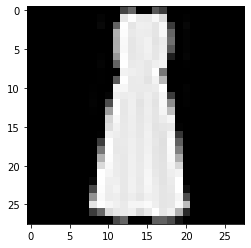

In [137]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


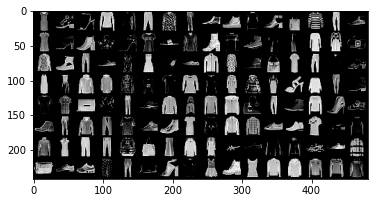

In [161]:
data_iter = iter(testloader)
imgs, labels = data_iter.next()
imshow(torchvision.utils.make_grid(imgs, nrow=16))

In [167]:
print(imgs.size(),imgs.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])


In [170]:
noise_factor = 0.2
imgs_noisy = imgs + noise_factor * torch.randn_like(imgs)

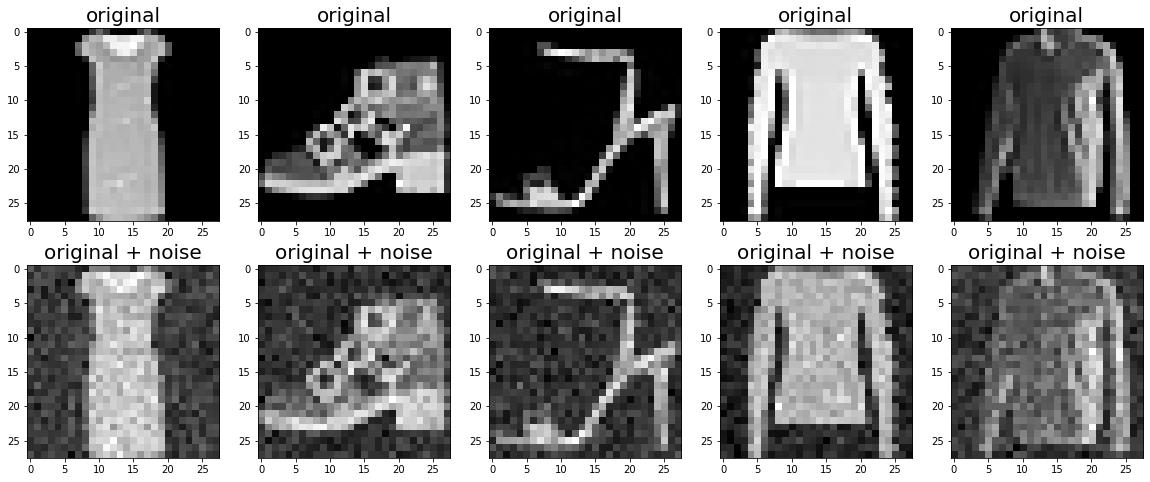

In [171]:
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i + 1) 
    plt.title("original", size=20) 
    plt.imshow(torch.squeeze(imgs[i])) 
    plt.gray() 
    bx = plt.subplot(2, n, n+ i + 1) 
    plt.title("original + noise", size=20) 
    plt.imshow(torch.squeeze(imgs_noisy[i])) 
plt.show()

In [175]:
def prepare_fashion_MNIST(batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
	transform = transforms.Compose([transforms.ToTensor(),])

	training_set = torchvision.datasets.FashionMNIST("../F_MNIST_data", train=True, download=False, transform=transform)
	test_set = torchvision.datasets.FashionMNIST("../F_MNIST_data", train=False, download=False, transform=transform)
	# num_workers denotes how many subprocesses to use for data loading
	trainloader = DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
	testloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)

	clssses = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
	return trainloader, testloader, clssses


def imshow(img):
	# img = img / 2 + 0.5  # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

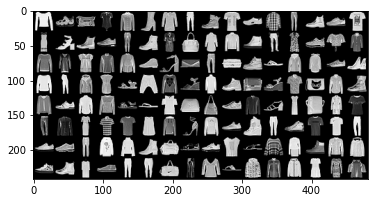

In [176]:
trainloader, testloader, classes = prepare_fashion_MNIST()
data_iter = iter(trainloader)
imgs, labels = data_iter.next()
imshow(torchvision.utils.make_grid(imgs, nrow=16))

In [177]:
result_dir = './conVAEfashion_result' # './convVAEresult'  result dir
save_dir = './Confashion_ckpt' # model saving directory

lr = 1e-3 # learning rate
z_dim = 20 # latent vector size of encoder
input_dim = 28*28 #input dimension (28*28 for MNIST)
h_dim = 400 
input_channel = 1 #input channel (1 for MNIST)

In [183]:
def train_fashion():
    myVAE = ConvVAE(input_channels=input_channel, z_dim=z_dim).to(device)
    #myVAE = VAE(input_dim, h_dim, z_dim).to(device)
    optimizer = optim.Adam(myVAE.parameters(), lr=lr)

    start_epoch = 0
    best_test_loss = np.finfo('f').max

    # optionally resume from a checkpoint
    if resume:
        if os.path.isfile(resume):
            print('=> loading checkpoint %s' % resume)
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch'] + 1
            best_test_loss = checkpoint['best_test_loss']
            myVAE.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print('=> loaded checkpoint %s' % resume)
        else:
            print('=> no checkpoint found at %s' % resume)

    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    trainloader, testloader, classes = prepare_fashion_MNIST(batch_size, num_worker)


    # training
    for epoch in range(start_epoch, epochs):

        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            # Remember to deploy the input data on GPU
            inputs = data[0] + noise_factor * torch.randn_like(data[0])
            imgs_noisy = inputs.to(device)
            inputs =  data[0].to(device)
            # forward
            res, mu, log_sigma = myVAE(imgs_noisy)

            loss, recon_loss, KLD = loss_func(res, inputs, mu, log_sigma)
            # zero out the paramter gradients
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print statistics every 100 batches
            if (i + 1) % 100 == 0:
                print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f} Total loss {:.4f}"
                      .format(epoch + 1, epochs, i + 1, len(trainloader), recon_loss.item(),
                              KLD.item(), loss.item()))

            if i == 0:
                # visualize reconstructed result at the beginning of each epoch
                x_concat = torch.cat([imgs_noisy.view(-1, 1, 28, 28), res.view(-1, 1, 28, 28)], dim=3)
                save_image(x_concat, ("./%s/reconstructed-%d.png" % (result_dir, epoch + 1)))

        # testing
        if (epoch + 1) % test_every == 0:
            test_avg_loss = 0.0
            with torch.no_grad():
                for idx, test_data in enumerate(testloader):
                    # get the inputs; data is a list of [inputs, labels]
                    test_inputs = test_data[0] + noise_factor * torch.randn_like(test_data[0])
                    imgs_noisy = test_inputs.to(device)
                    test_data1 = test_data[0].to(device)
        #            test_inputs = test_inputs.view(-1, input_dim)
                    # forward
                    test_res, test_mu, test_log_sigma = myVAE(imgs_noisy)

                    test_loss, test_recon_loss, test_KLD = loss_func(test_res, test_data1, test_mu, test_log_sigma)

                    test_avg_loss += test_loss

                test_avg_loss /= len(testloader.dataset)

                # we randomly sample some images' latent vectors from its distribution
                z = torch.randn(batch_size, z_dim).to(device)
                random_res = myVAE.decode(z).view(-1, 1, 28, 28)
                save_image(random_res, "./%s/random_sampled-%d.png" % (result_dir, epoch + 1))

                # save model
                is_best = test_avg_loss < best_test_loss
                best_test_loss = min(test_avg_loss, best_test_loss)
                save_checkpoint({
                    'epoch': epoch,
                    'best_test_loss': best_test_loss,
                    'state_dict': myVAE.state_dict(),
                    'optimizer': optimizer.state_dict(),
                }, is_best,save_dir)

In [184]:
train_fashion()

Epoch[1/50], Step [100/469], Reconst Loss: 34349.6758, KL Div: 1529.3993 Total loss 35879.0742
Epoch[1/50], Step [200/469], Reconst Loss: 31900.2949, KL Div: 1590.7520 Total loss 33491.0469
Epoch[1/50], Step [300/469], Reconst Loss: 31940.6973, KL Div: 1435.1183 Total loss 33375.8164
Epoch[1/50], Step [400/469], Reconst Loss: 29640.0352, KL Div: 1560.6664 Total loss 31200.7012
Epoch[2/50], Step [100/469], Reconst Loss: 28814.2695, KL Div: 1512.9758 Total loss 30327.2461
Epoch[2/50], Step [200/469], Reconst Loss: 28419.1719, KL Div: 1567.6704 Total loss 29986.8418
Epoch[2/50], Step [300/469], Reconst Loss: 31683.4219, KL Div: 1547.7501 Total loss 33231.1719
Epoch[2/50], Step [400/469], Reconst Loss: 31032.6602, KL Div: 1510.5027 Total loss 32543.1621
Epoch[3/50], Step [100/469], Reconst Loss: 30255.6758, KL Div: 1484.1389 Total loss 31739.8145
Epoch[3/50], Step [200/469], Reconst Loss: 29523.5527, KL Div: 1599.6296 Total loss 31123.1816
Epoch[3/50], Step [300/469], Reconst Loss: 29209.1

Epoch[22/50], Step [300/469], Reconst Loss: 27447.7012, KL Div: 1802.7842 Total loss 29250.4844
Epoch[22/50], Step [400/469], Reconst Loss: 28174.5039, KL Div: 1745.9250 Total loss 29920.4297
Epoch[23/50], Step [100/469], Reconst Loss: 28332.0215, KL Div: 1821.5229 Total loss 30153.5449
Epoch[23/50], Step [200/469], Reconst Loss: 27627.8711, KL Div: 1741.2985 Total loss 29369.1699
Epoch[23/50], Step [300/469], Reconst Loss: 28244.2383, KL Div: 1776.8635 Total loss 30021.1016
Epoch[23/50], Step [400/469], Reconst Loss: 26804.2070, KL Div: 1766.0188 Total loss 28570.2266
Epoch[24/50], Step [100/469], Reconst Loss: 28639.1250, KL Div: 1805.2998 Total loss 30444.4258
Epoch[24/50], Step [200/469], Reconst Loss: 28280.9785, KL Div: 1819.3922 Total loss 30100.3711
Epoch[24/50], Step [300/469], Reconst Loss: 27960.4258, KL Div: 1779.2500 Total loss 29739.6758
Epoch[24/50], Step [400/469], Reconst Loss: 28566.6426, KL Div: 1775.3965 Total loss 30342.0391
Epoch[25/50], Step [100/469], Reconst Lo

Epoch[44/50], Step [100/469], Reconst Loss: 28493.7285, KL Div: 1784.1218 Total loss 30277.8496
Epoch[44/50], Step [200/469], Reconst Loss: 29849.4512, KL Div: 1815.2299 Total loss 31664.6816
Epoch[44/50], Step [300/469], Reconst Loss: 27983.1973, KL Div: 1846.1074 Total loss 29829.3047
Epoch[44/50], Step [400/469], Reconst Loss: 26870.1680, KL Div: 1873.7427 Total loss 28743.9102
Epoch[45/50], Step [100/469], Reconst Loss: 26972.8242, KL Div: 1755.5872 Total loss 28728.4121
Epoch[45/50], Step [200/469], Reconst Loss: 28451.5039, KL Div: 1794.6082 Total loss 30246.1113
Epoch[45/50], Step [300/469], Reconst Loss: 27692.6797, KL Div: 1845.3102 Total loss 29537.9902
Epoch[45/50], Step [400/469], Reconst Loss: 27789.3008, KL Div: 1817.4885 Total loss 29606.7891
Epoch[46/50], Step [100/469], Reconst Loss: 27657.3262, KL Div: 1863.8469 Total loss 29521.1738
Epoch[46/50], Step [200/469], Reconst Loss: 28190.8574, KL Div: 1850.8501 Total loss 30041.7070
Epoch[46/50], Step [300/469], Reconst Lo